# Visualization with Altair
[Altair](https://altair-viz.github.io) is *declarative*  visualization library for Python and based on [Vega-Lite](https://vega.github.io/vega-lite/).

Declartive means that - in Altair - you specify what you want the visualization to use, i.e.,
* Which attribute gets mapped to x and y.
* Color the marks by a one attribute and set vary its size based on another, etc.

So the key idea is that you link attributes to visual encoding channels.

The first step to create an Altair visualization is to specify a [mark type](https://altair-viz.github.io/user_guide/marks.html).
Altair comes with `point`, `line`, `bar`, `area`, `geoshape`, and more.

Then you are able to [encode](https://altair-viz.github.io/user_guide/encoding.html) `position`, `color`, `shape`, and `size` based on your data.

In [1]:
# See https://github.com/plotly/plotly.py and https://plot.ly/python/figurewidget/
import altair as alt

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

import pandas as pd
import numpy as np

In [2]:
alt.__version__

'3.2.0'

In [3]:
#use a standard dataset of heterogenous data
cars = pd.read_csv('data/mtcars.csv')

## Scatterplot

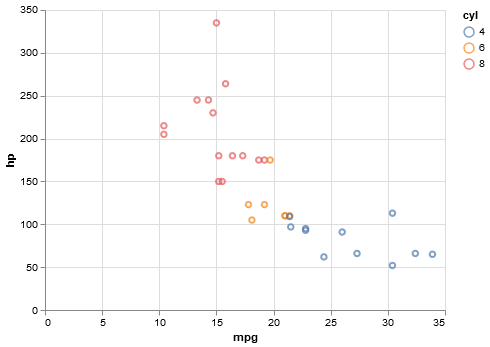

In [4]:
# We use a point as mark
alt.Chart(cars).mark_point().encode(
    x='mpg:Q',
    y='hp:Q',
    color='cyl:N'
)

In [5]:
# But some other marks work just as well (or a little less 😉 ).
import ipywidgets as widgets

baseChart = alt.Chart(cars);

@widgets.interact(mark_type = widgets.Dropdown(
    options = [('point', baseChart.mark_point()),
                 ('circle', baseChart.mark_circle()), 
                 ('square', baseChart.mark_square()), 
                 ('line', baseChart.mark_line())],
    description = 'Mark Type:'))
def show_plot(mark_type):
    return mark_type.encode(
    x='mpg:Q',
    y='hp:Q',
    color='cyl:N'
)   


interactive(children=(Dropdown(description='Mark Type:', options=(('point', alt.Chart(...)), ('circle', alt.Ch…

## Interactivity 
### Brushing

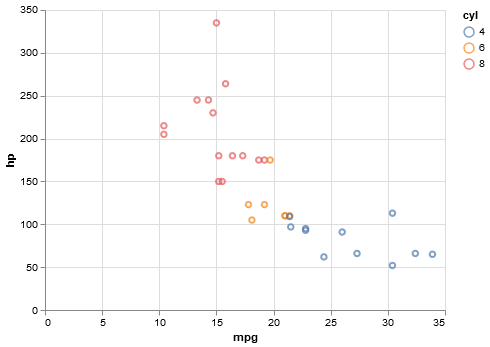

In [6]:
brush = alt.selection_interval()  # selection of type "interval"

alt.Chart(cars).mark_point().encode(
    x='mpg:Q',
    y='hp:Q',
    color=alt.condition(brush, 'cyl:N', alt.value('lightgray')) # unselected become lightgrey
).add_selection(
    brush  # bind this brush to our chart
)

### Zooming

## Linking Charts

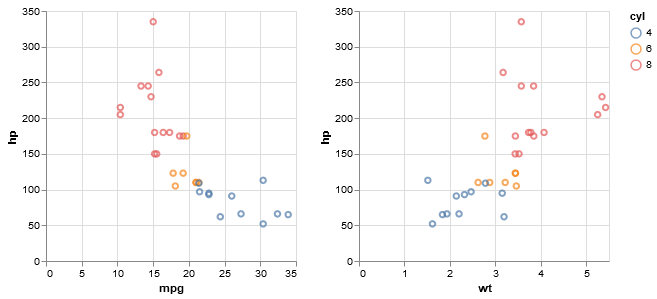

In [7]:
brush = alt.selection_interval(encodings=['x'])

chart = alt.Chart(cars).mark_point().encode(
    y='hp:Q',
    color=alt.condition(brush, 'cyl:N', alt.value('lightgray'))
).properties(
    width=250,
    height=250
).add_selection(
    brush
)

chart.encode(x='mpg:Q')| chart.encode(x='wt:Q')